In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh import extract_relevant_features

In [27]:
df = pd.read_csv("power_usage_2016_to_2020.csv")
df

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday
...,...,...,...,...
35947,2020-07-07 19:00:00,1.307,1,weekday
35948,2020-07-07 20:00:00,2.872,1,weekday
35949,2020-07-07 21:00:00,2.138,1,weekday
35950,2020-07-07 22:00:00,2.199,1,weekday


In [28]:
df["StartDate"] = pd.to_datetime(df["StartDate"])
df = df.set_index("StartDate")


In [30]:
df = df[['Value (kWh)']]

,Value (kWh)
StartDate,
2016-01-06 00:00:00,1.057
2016-01-06 01:00:00,1.171
2016-01-06 02:00:00,0.560
2016-01-06 03:00:00,0.828
2016-01-06 04:00:00,0.932
...,...
2020-07-07 19:00:00,1.307
2020-07-07 20:00:00,2.872
2020-07-07 21:00:00,2.138


1. Генерация признаков

In [38]:
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['week'] = df.index.weekofyear
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour

df.tail()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2532\2695324432.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.weekofyear


,Value (kWh),year,quarter,month,week,day,dayofweek,hour,minute
StartDate,,,,,,,,,
2020-07-07 19:00:00,1.307,2020,3,7,28,7,1,19,0
2020-07-07 20:00:00,2.872,2020,3,7,28,7,1,20,0
2020-07-07 21:00:00,2.138,2020,3,7,28,7,1,21,0
2020-07-07 22:00:00,2.199,2020,3,7,28,7,1,22,0
2020-07-07 23:00:00,1.809,2020,3,7,28,7,1,23,0


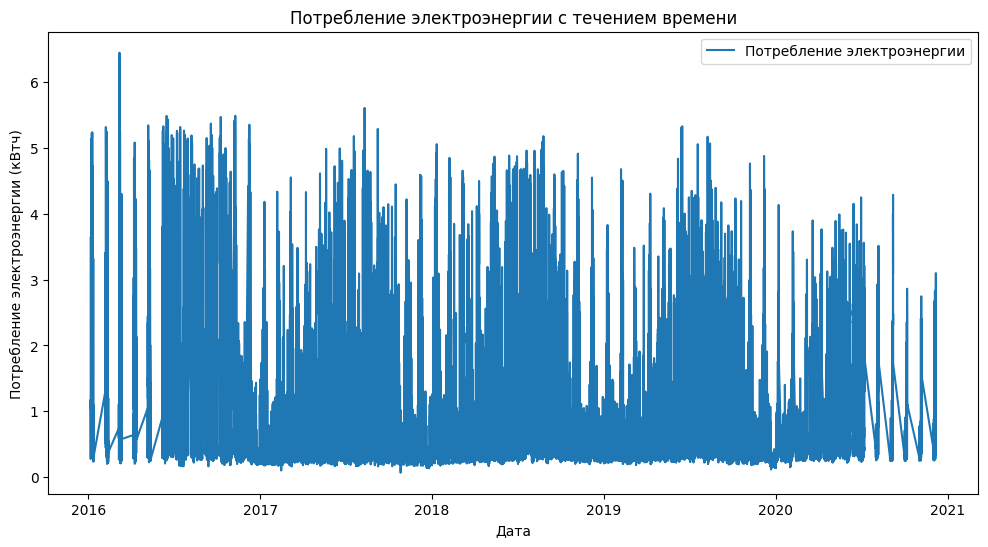

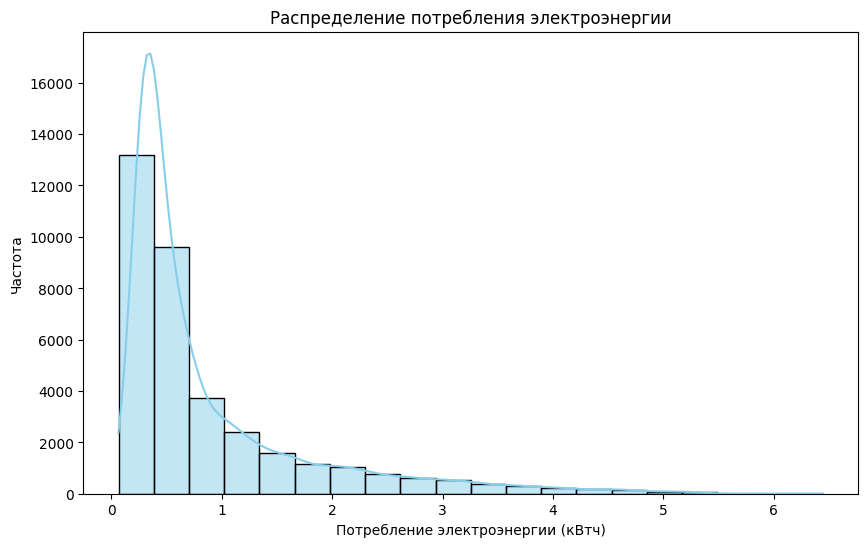

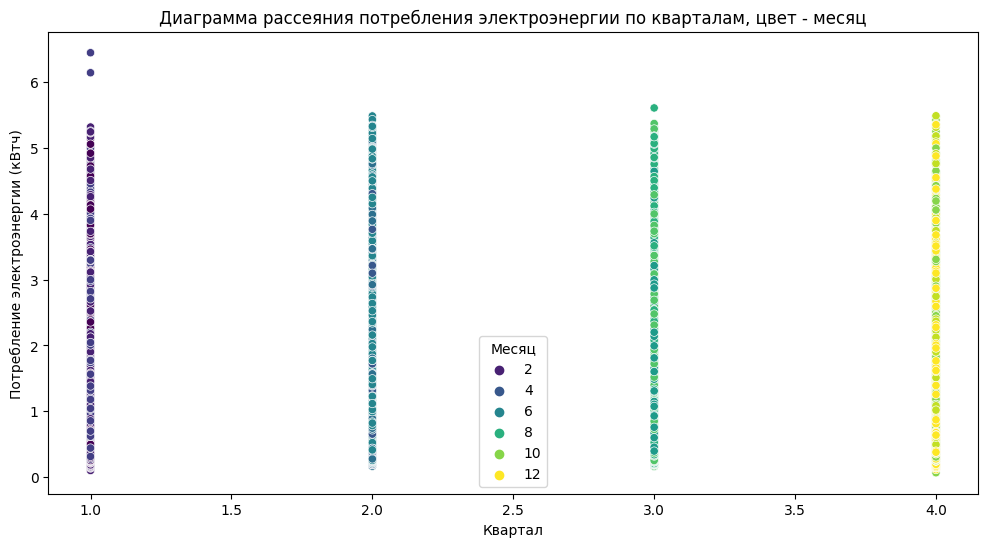

In [40]:
# Линейная диаграмма потребления электроэнергии с течением времени
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Value (kWh)', data=df,
             label='Потребление электроэнергии')
plt.title('Потребление электроэнергии с течением времени')
plt.xlabel('Дата')
plt.ylabel('Потребление электроэнергии (кВтч)')
plt.legend()
plt.show()

# Гистограмма потребления электроэнергии
plt.figure(figsize=(10, 6))
sns.histplot(df['Value (kWh)'], bins=20, kde=True, color='skyblue')
plt.title('Распределение потребления электроэнергии')
plt.xlabel('Потребление электроэнергии (кВтч)')
plt.ylabel('Частота')
plt.show()

# Диаграмма рассеяния потребления электроэнергии от различных временных характеристик
plt.figure(figsize=(12, 6))
sns.scatterplot(x='quarter', y='Value (kWh)', data=df,
                hue='month', palette='viridis')
plt.title('Диаграмма рассеяния потребления электроэнергии по кварталам, цвет - месяц')
plt.xlabel('Квартал')
plt.ylabel('Потребление электроэнергии (кВтч)')
plt.legend(title='Месяц')
plt.show()


2.	Автоматическая генерация признаков с помощью библиотеки tsfresh

In [44]:
extraction_settings = ComprehensiveFCParameters()

# Извлечение признаков
features = extract_features(
    df, column_id='Value (kWh)', default_fc_parameters=extraction_settings)

# Заполнение отсутствующих значений
imputed_features = impute(features)

# Результаты
print(imputed_features.head())


Feature Extraction: 100%|██████████| 20/20 [07:15<00:00, 21.78s/it]
c:\Python\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['minute__variation_coefficient' 'minute__benford_correlation'
 'minute__autocorrelation__lag_0' ...
 'hour__fft_coefficient__attr_"angle"__coeff_98'
 'hour__fft_coefficient__attr_"angle"__coeff_99'
 'hour__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


       minute__variance_larger_than_standard_deviation  \
0.064                                              0.0   
0.098                                              0.0   
0.112                                              0.0   
0.131                                              0.0   
0.134                                              0.0   

       minute__has_duplicate_max  minute__has_duplicate_min  \
0.064                        0.0                        0.0   
0.098                        0.0                        0.0   
0.112                        0.0                        0.0   
0.131                        0.0                        0.0   
0.134                        1.0                        1.0   

       minute__has_duplicate  minute__sum_values  minute__abs_energy  \
0.064                    0.0                 0.0                 0.0   
0.098                    0.0                 0.0                 0.0   
0.112                    0.0                 0.0        

3. Ассиметрия и эксцесс

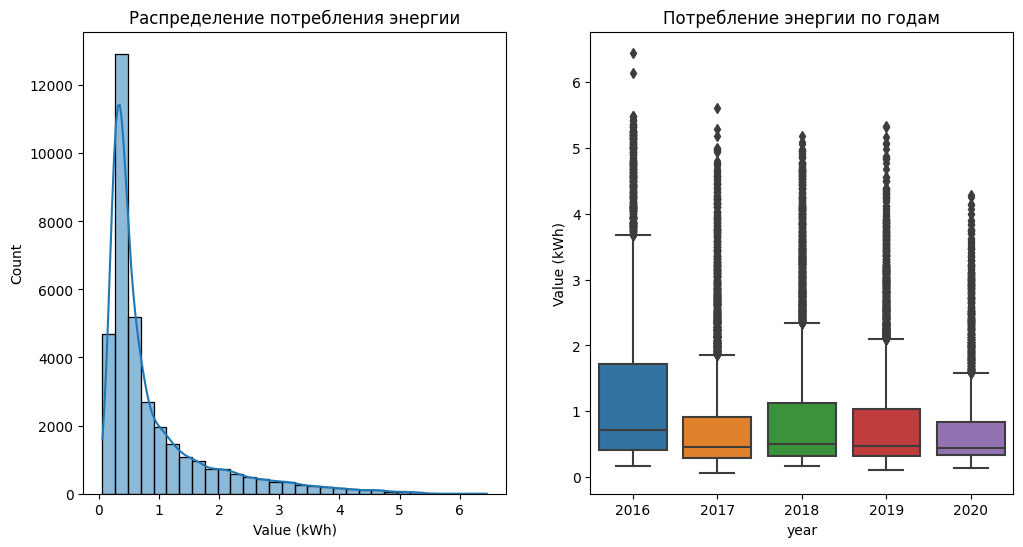

Асимметрия: 2.1284142539189737
Эксцесс: 4.532479312377308


In [45]:
asymmetry = skew(df['Value (kWh)'])
kurt = kurtosis(df['Value (kWh)'])

# Визуализация распределения
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Value (kWh)'], bins=30, kde=True)
plt.title('Распределение потребления энергии')

plt.subplot(1, 2, 2)
sns.boxplot(x='year', y='Value (kWh)', data=df)
plt.title('Потребление энергии по годам')

plt.show()

# Вывод результатов
print(f"Асимметрия: {asymmetry}")
print(f"Эксцесс: {kurt}")


В нашем случае значение асимметрии равно 2.1284, что говорит о том, что у нас есть смещение вправо (положительная асимметрия)
В нашем случае значение эксцесса равно 4.5325, что может указывать на более острый, чем нормальное, пик в распределении.